In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os 

In [2]:
df = pd.read_csv('Shock_index.csv')

In [3]:
df

,Unnamed: 0,level_0,index,Heart_Rate,Systolic_blood_pressure(SBP),Shock_index,critically ill
0,0,0,0,54,28.56250,1.890591,1
1,1,1,1,45,52.50000,0.857143,0
2,2,2,2,69,66.81250,1.032741,1
3,3,3,3,90,73.78125,1.219822,1
4,4,4,4,87,86.81250,1.002160,1
5,5,5,5,78,43.12500,1.808696,1
6,6,6,6,114,70.40625,1.619174,1
7,7,7,7,84,62.84375,1.336648,1
8,8,8,8,90,93.87500,0.958722,0
9,9,9,9,120,59.68750,2.010471,1


In [4]:
X = df.drop(['Unnamed: 0','level_0','index','critically ill'], axis = 1)

In [5]:
Y = df['critically ill']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)

Shape of Training Data (36, 3)
Shape of Testing Data (12, 3)


# Machine Learning

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
rfc = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, Y_train)
  
# performing predictions on the test dataset
y_pred = rfc.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))


ACCURACY OF THE MODEL:  0.9166666666666666


In [64]:
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

Confusion Matrix:
 [[4 1]
 [0 7]]


In [65]:
print_score(rfc,X_train, Y_train,
            X_test, Y_test,
            train=True)
  
print_score(rfc,X_train, Y_train,
            X_test, Y_test,
            train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        19

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix: 
 [[17  0]
 [ 0 19]]

Average Accuracy: 	 0.9750
Accuracy SD: 		 0.0750
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12


Confusion Matrix: 
 [[4 0]
 [1 7]]

accuracy score: 0.9167

---------------------------------

<AxesSubplot: >

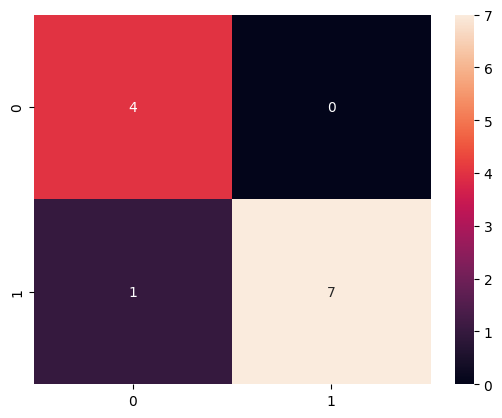

In [66]:
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True)